Task 6:Comparing Sales Trends for Multiple Categories in 2022 Scenario: The Marketing Team wants to compare the sales trends for multiple categories in 2022 to identify which category performed best. Requirements: 1. Aggregate the sales data by category for 2022. 2. Plot a time series of sales trends for each category (use order_date to group by month or week). 3. Provide insights on which category had the highest sales growth. Key Features to Use: • category • order_date (for time series analysis) • qty_ordered

<Figure size 1200x600 with 0 Axes>

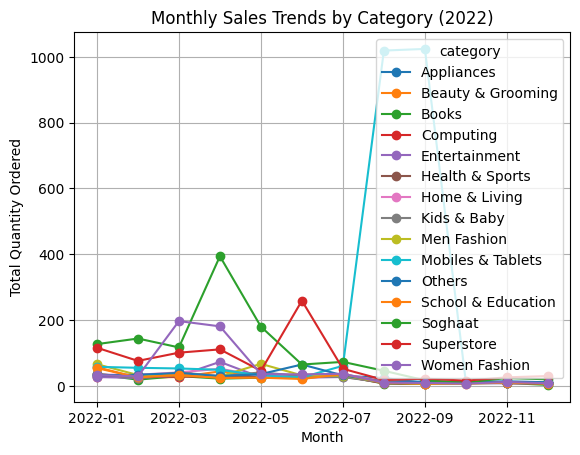

,category,qty_ordered
9,Mobiles & Tablets,2408


Category with the highest total sales in 2022: Mobiles & Tablets


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("orders.csv")

df['order_date'] = pd.to_datetime(df['order_date'])
df_2022 = df[df['order_date'].dt.year == 2022]

df_2022['month'] = df_2022['order_date'].dt.to_period('M').astype(str)
category_trends = df_2022.groupby(['category', 'month'], as_index=False)['qty_ordered'].sum()

pivot_trends = category_trends.pivot(index='month', columns='category', values='qty_ordered').fillna(0)

plt.figure(figsize=(12,6))
pivot_trends.plot(marker='o')
plt.title('Monthly Sales Trends by Category (2022)')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.show()

total_sales_2022 = df_2022.groupby('category', as_index=False)['qty_ordered'].sum().sort_values(by='qty_ordered', ascending=False)
category_trends.to_csv("Category_Trends_2022.csv", index=False)
total_sales_2022.to_csv("Category_Total_Sales_2022.csv", index=False)

display(total_sales_2022.head(1))
print("Category with the highest total sales in 2022:", total_sales_2022.iloc[0]['category'])
